# Support Vector Machines and Kernels

## Introduction

We will be using the wine quality data set for these exercises. This data set contains various chemical properties of wine, such as acidity, sugar, pH, and alcohol. It also contains a quality metric (3-9, with highest being better) and a color (red or white). The name of the file is `Wine_Quality_Data.csv`.

In [ ]:
from __future__ import print_function
import os
#Please set the path below as per your system data folder location
#data_path = ['..', 'data']
data_path = ['data']


* Import the data.
* Create the target variable `y` as a 1/0 column where 1 means red.
* Create a `pairplot` for the dataset.
* Create a bar plot showing the correlations between each column and `y`
* Pick the most 2 correlated fields (using the absolute value of correlations) and create `X`
* Use MinMaxScaler to scale `X`. Note that this will output a np.array. Make it a DataFrame again and rename the columns appropriately.

In [27]:
import pandas as pd
import numpy as np

data = pd.read_csv('/Users/ebaniez/Downloads/Wine_Quality_Data.csv')

In [28]:
data.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color  
0      9.4        5   red  
1      9.8        5   red  
2      9.8        5   red  
3      9.8        6   red  
4      9.4        5   red

In [29]:
data.describe()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378  
std       0.160787     0.148806     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

In [30]:
print(data.columns)


Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')


In [32]:
data['y'] = (data['color'] == 'red').astype(int)


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_context('talk')
sns.set_palette('dark')
sns.set_style('white')

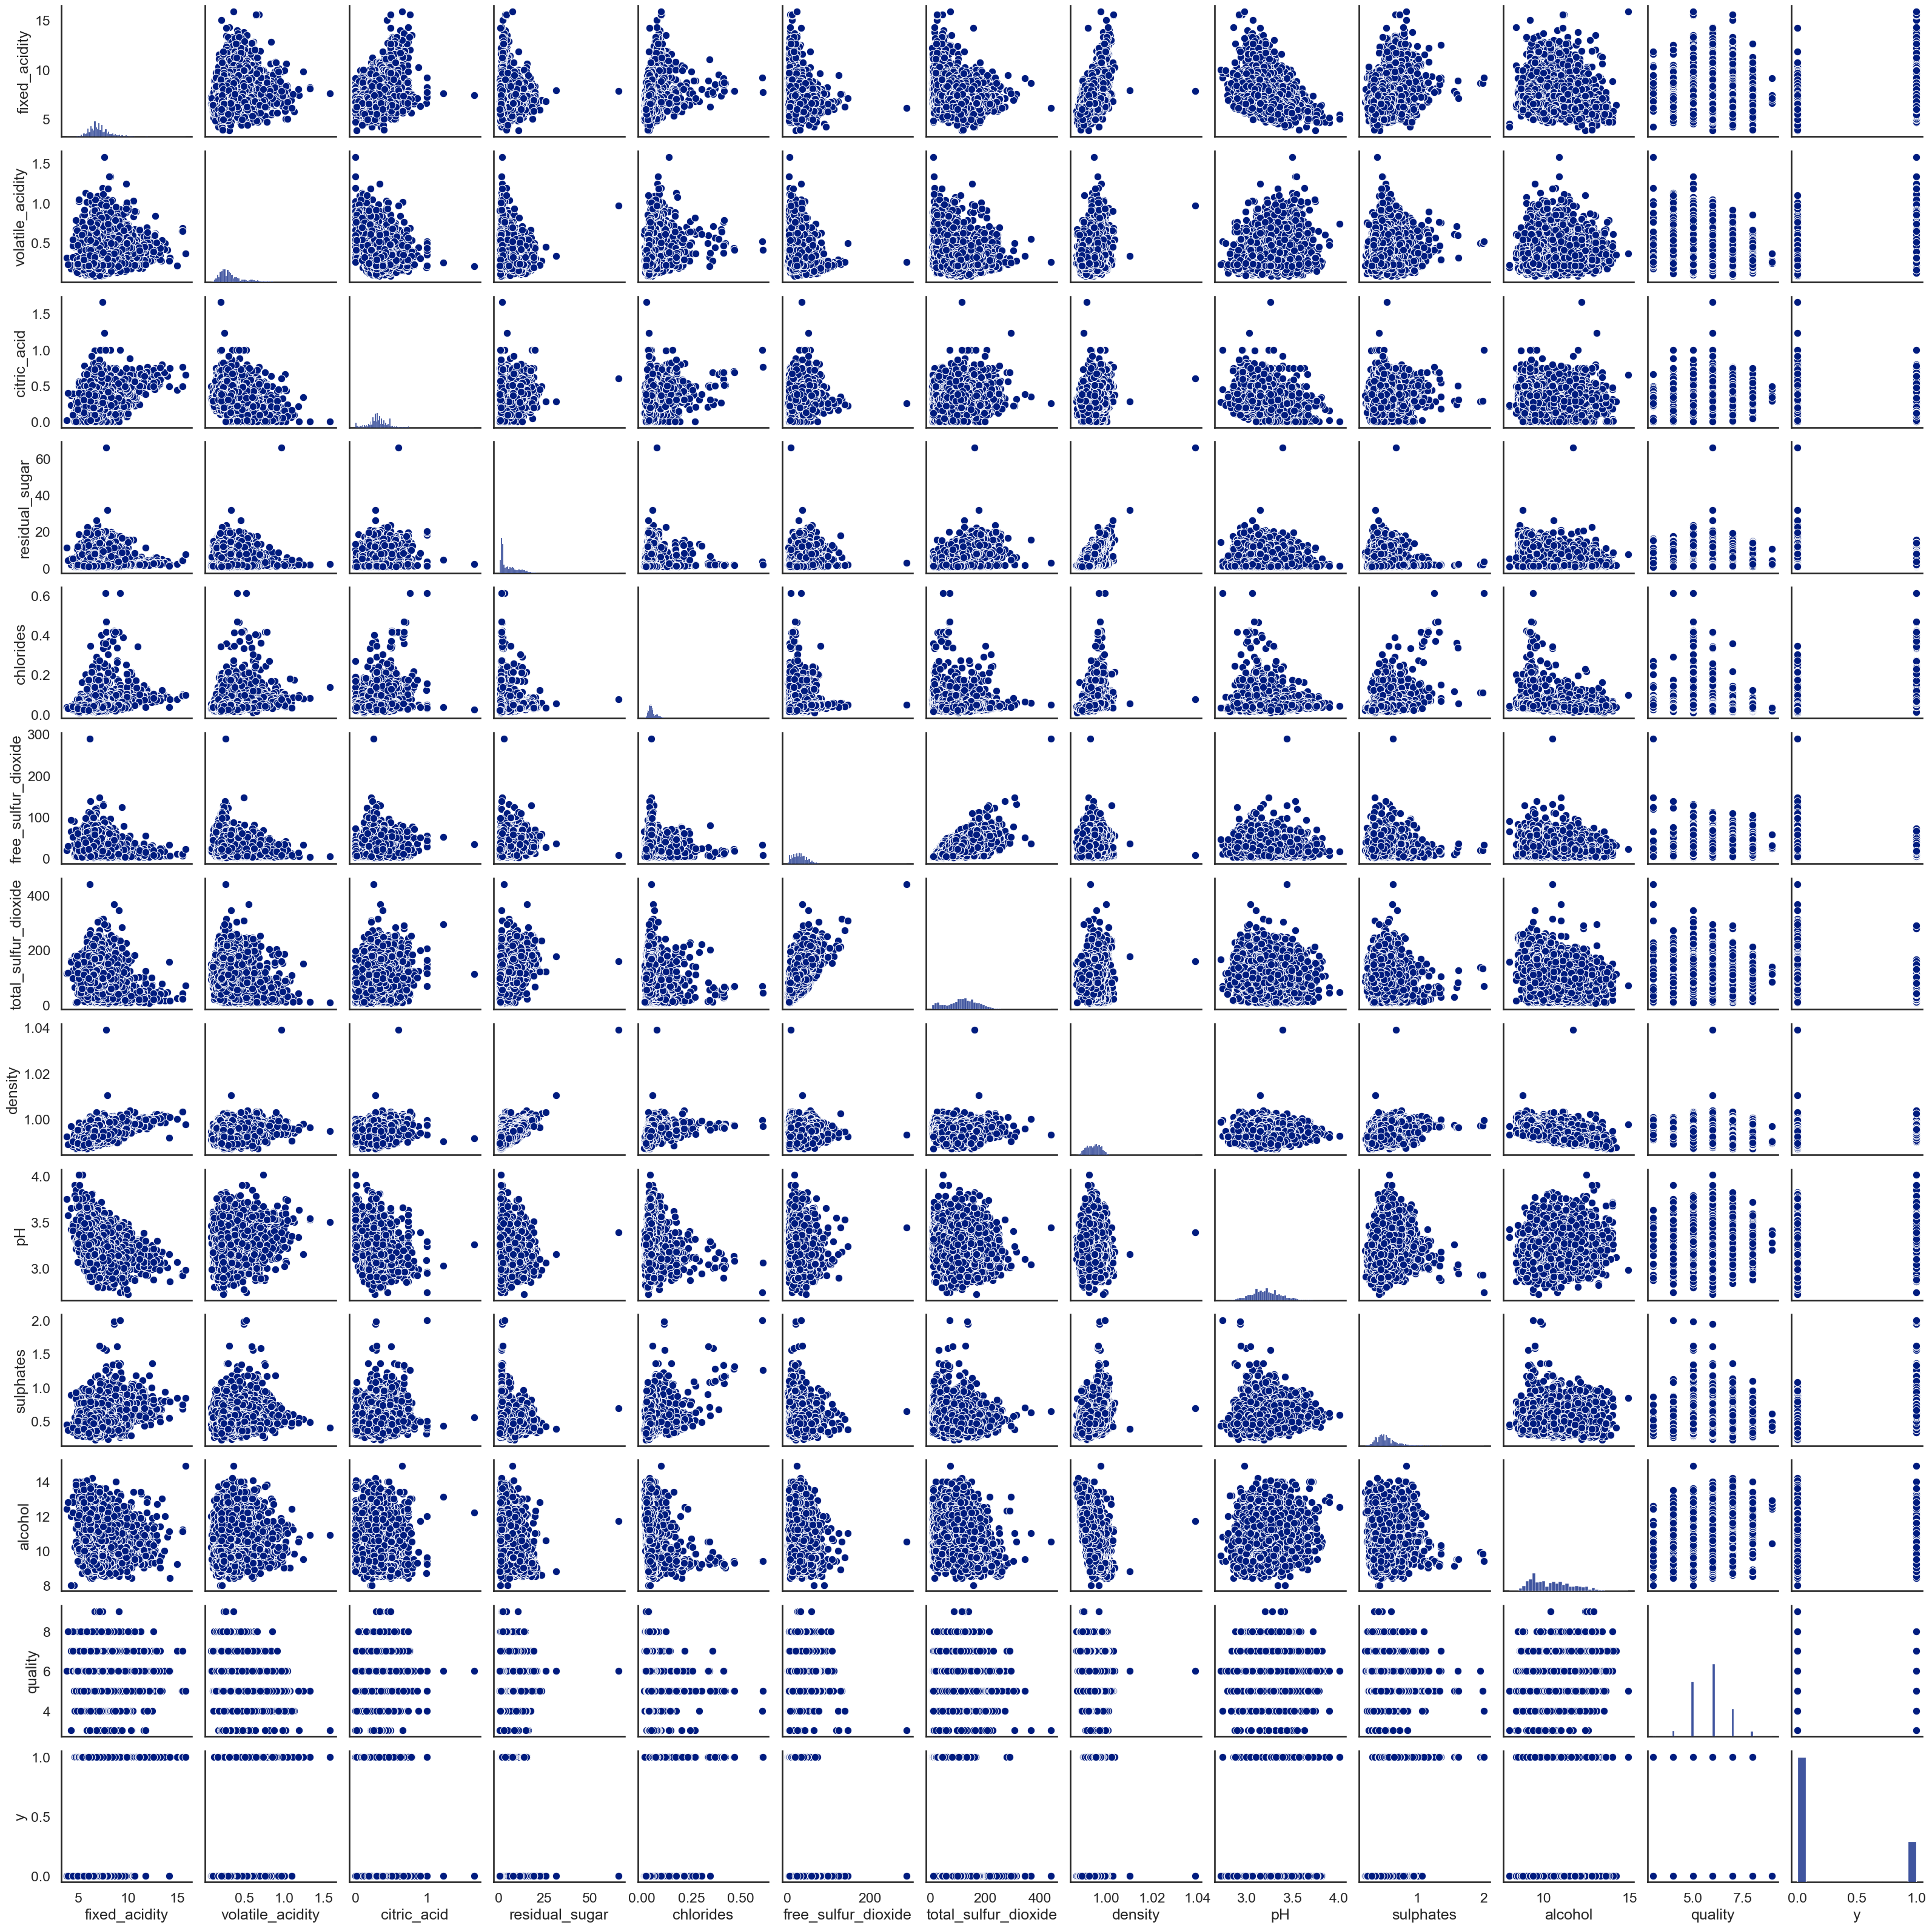

In [34]:

sns.pairplot(data)
plt.show()


/var/folders/zp/zvv6x7212q57vx2nmb2_7pxc0000gn/T/ipykernel_18638/2820474956.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = data.corr()['y'].drop('y')


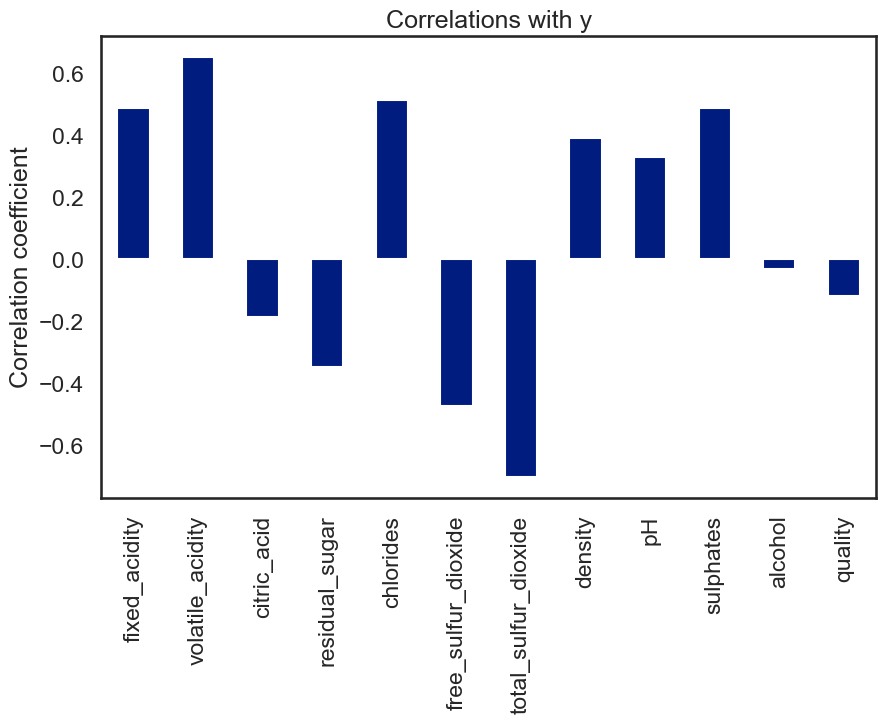

In [35]:
correlations = data.corr()['y'].drop('y')
correlations.plot(kind='bar', figsize=(10, 6))
plt.title('Correlations with y')
plt.ylabel('Correlation coefficient')
plt.show()


In [38]:
# Getting absolute values of correlations and sorting
top_correlations = correlations.abs().sort_values(ascending=False)

# Getting the top 2 fields
top_2_fields = top_correlations.index[:2]
X = data[top_2_fields]


In [39]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Converting scaled data back to DataFrame and renaming columns
X_df = pd.DataFrame(X_scaled, columns=top_2_fields)




Look at the decision boundary of a LinearSVC classifier on this dataset. Check out [this example](http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html#sphx-glr-auto-examples-svm-plot-iris-py) in sklearn's documentation. 

* Fit a Linear Support Vector Machine Classifier to `X`, `y`.
* Pick 300 samples from `X`. Get the corresponding `y` value. Store them in variables `X_color` and `y_color`. This is because original dataset is too large and it produces a crowded plot.
* Modify `y_color` so that it has the value "red" instead of 1 and 'yellow' instead of 0.
* Scatter plot X_color's columns. Use the keyword argument "color=y_color" to color code samples.
* Use the code snippet below to plot the decision surface in a color coded way.

```python
x_axis, y_axis = np.arange(0, 1, .005), np.arange(0, 1, .005)
xx, yy = np.meshgrid(x_axis, y_axis)
xx_ravel = xx.ravel()
yy_ravel = yy.ravel()
X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
y_grid_predictions = *[YOUR MODEL]*.predict(X_grid)
y_grid_predictions = y_grid_predictions.reshape(xx.shape)
ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
```

In [40]:
from sklearn.svm import LinearSVC

LSVC = LinearSVC(max_iter=10000)
LSVC.fit(X_df, data['y'])


/Users/ebaniez/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC(max_iter=10000)

In [41]:
sample_indices = np.random.choice(X.index, size=300, replace=False)
X_color = X.iloc[sample_indices]
y_color = data['y'].iloc[sample_indices]


In [42]:
y_color = y_color.replace({1: 'red', 0: 'yellow'})


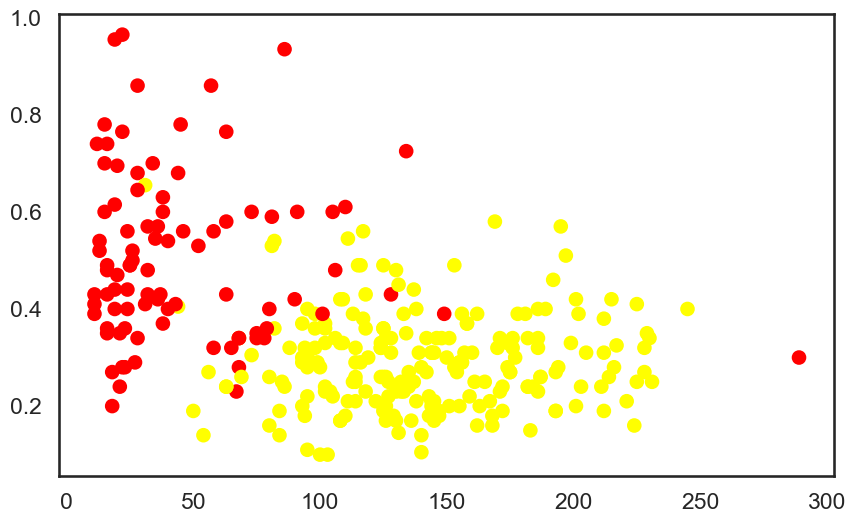

In [43]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(X_color.iloc[:, 0], X_color.iloc[:, 1], color=y_color)


In [44]:
x_axis, y_axis = np.arange(0, 1, .005), np.arange(0, 1, .005)
xx, yy = np.meshgrid(x_axis, y_axis)
xx_ravel = xx.ravel()
yy_ravel = yy.ravel()
X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
y_grid_predictions = LSVC.predict(X_grid)
y_grid_predictions = y_grid_predictions.reshape(xx.shape)
ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
plt.show()


/Users/ebaniez/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


Fit a Gaussian kernel SVC and see how the decision boundary changes.



In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC

def plot_decision_boundary(estimator, X, y):
    # 1. Fit model
    estimator.fit(X, y)
    
    # 2. Get 300 samples from X and the corresponding y's
    sample_indices = np.random.choice(X.index, size=300, replace=False)
    X_color = X.iloc[sample_indices]
    y_color = y.iloc[sample_indices]
    y_color = y_color.replace({1: 'red', 0: 'yellow'})
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # 3. Create grid, predict, plot using ax.contourf
    x_axis, y_axis = np.arange(0, 1, .005), np.arange(0, 1, .005)
    xx, yy = np.meshgrid(x_axis, y_axis)
    X_grid = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()])
    y_grid_predictions = estimator.predict(X_grid)
    y_grid_predictions = y_grid_predictions.reshape(xx.shape)
    ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
    
    # 4. Add on the scatter plot
    ax.scatter(X_color.iloc[:, 0], X_color.iloc[:, 1], color=y_color)
    plt.show

    

Decision Boundary for gamma = 0.5


/Users/ebaniez/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Decision Boundary for gamma = 1


/Users/ebaniez/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Decision Boundary for gamma = 2


/Users/ebaniez/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Decision Boundary for gamma = 10


/Users/ebaniez/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


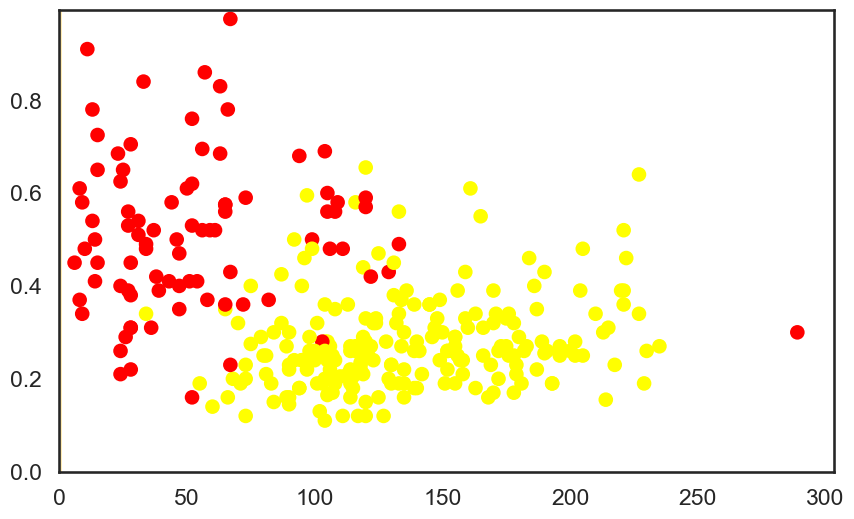

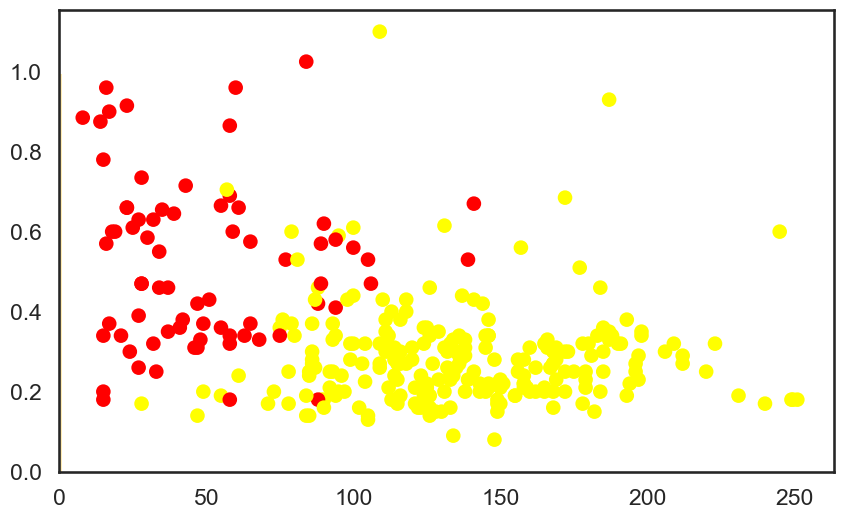

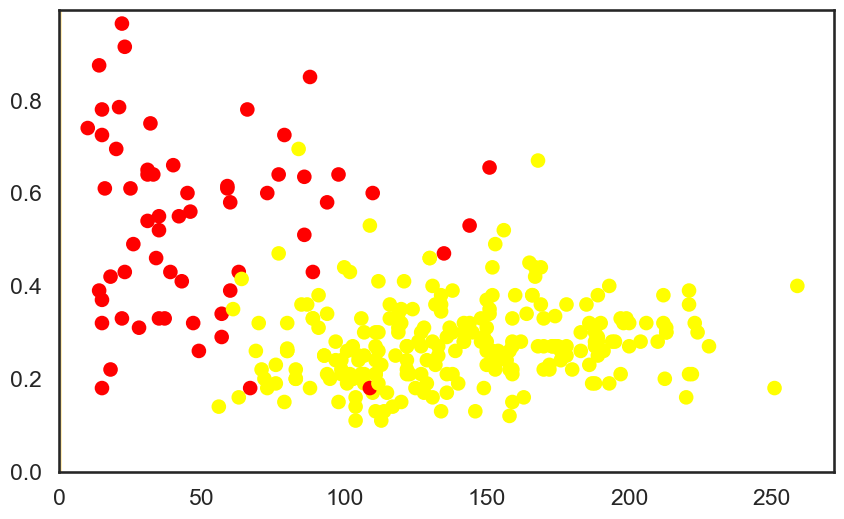

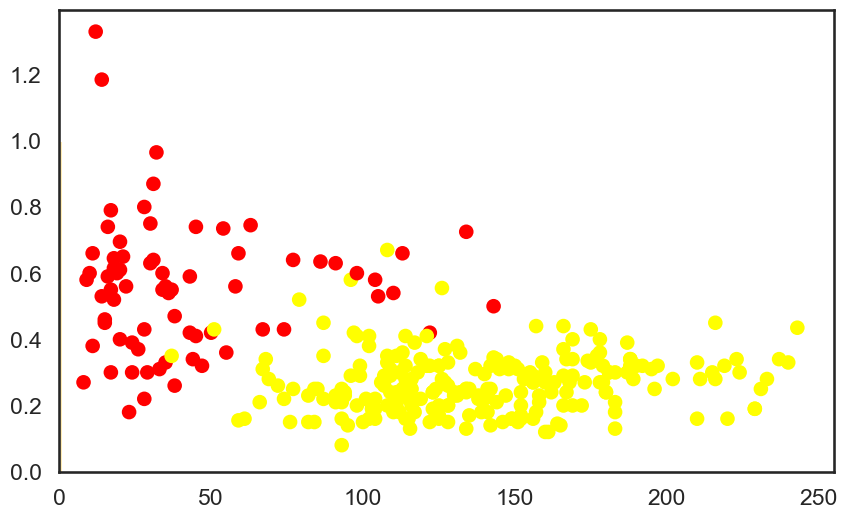

In [47]:
from sklearn.svm import SVC

gammas = [.5, 1, 2, 10]
for gamma in gammas:
    estimator = SVC(kernel='rbf', gamma=gamma)
    print(f"Decision Boundary for gamma = {gamma}")
    plot_decision_boundary(estimator, X, data['y'])



Decision Boundary for C = 0.1


/Users/ebaniez/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Decision Boundary for C = 1


/Users/ebaniez/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Decision Boundary for C = 10


/Users/ebaniez/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


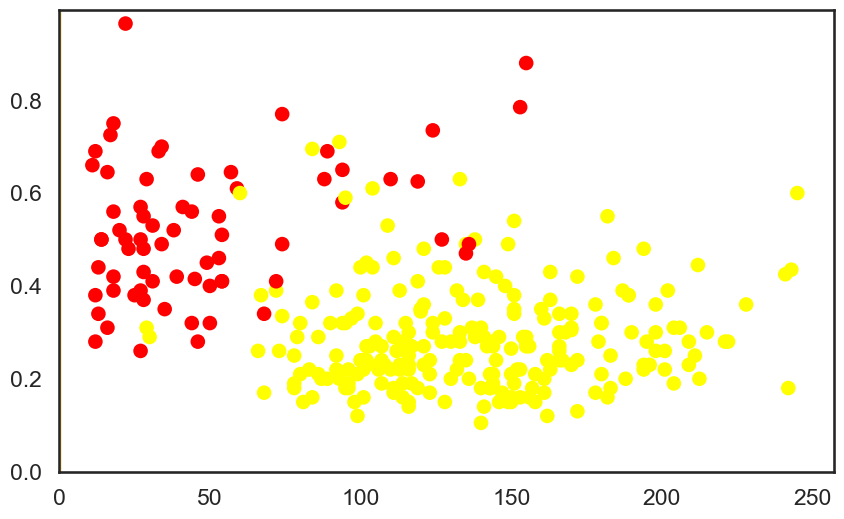

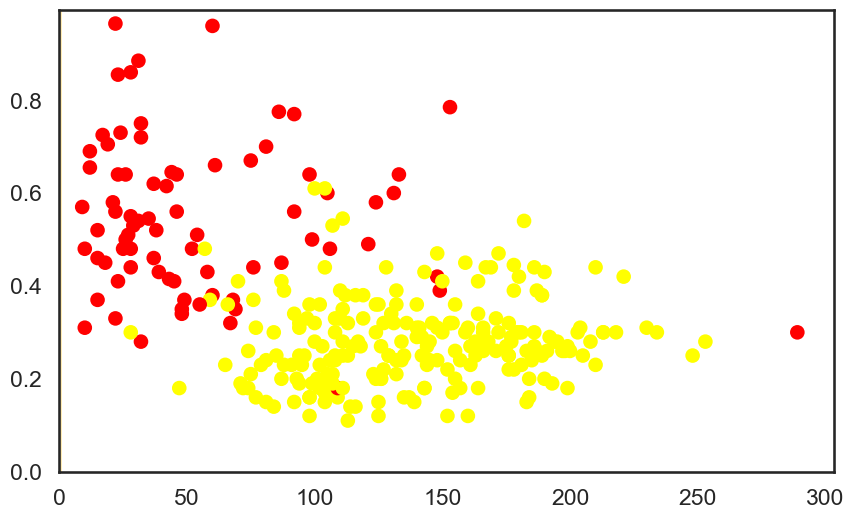

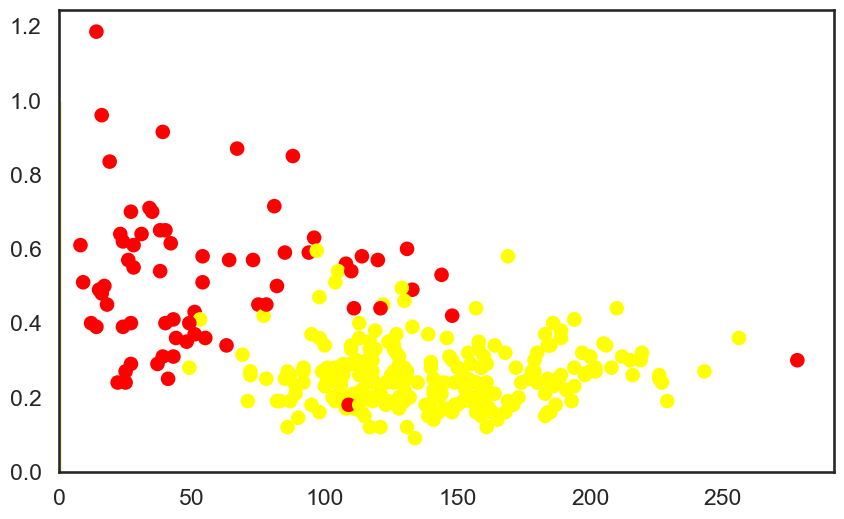

In [48]:
gamma = 1
Cs = [.1, 1, 10]
for C in Cs:
    estimator = SVC(kernel='rbf', gamma=gamma, C=C)
    print(f"Decision Boundary for C = {C}")
    plot_decision_boundary(estimator, X, data['y'])



Fit a Polynomial kernel SVC with degree 3 and see how the decision boundary changes.


Decision Boundary for Polynomial Kernel SVC with C = 10


/Users/ebaniez/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Decision Boundary for Polynomial Kernel SVC with C = 20


/Users/ebaniez/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Decision Boundary for Polynomial Kernel SVC with C = 100


/Users/ebaniez/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Decision Boundary for Polynomial Kernel SVC with C = 200


/Users/ebaniez/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


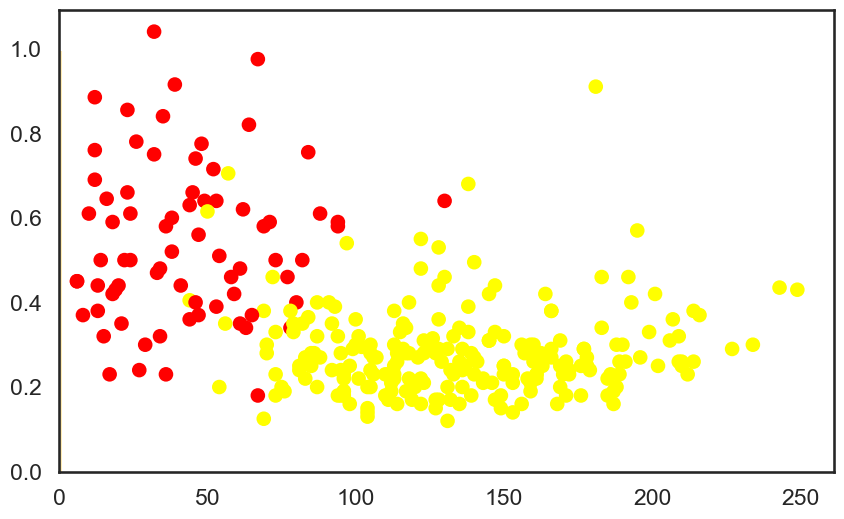

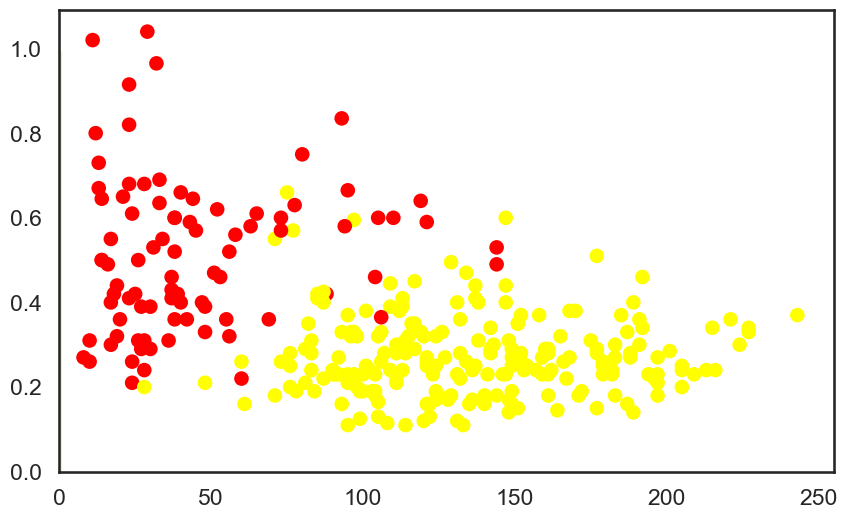

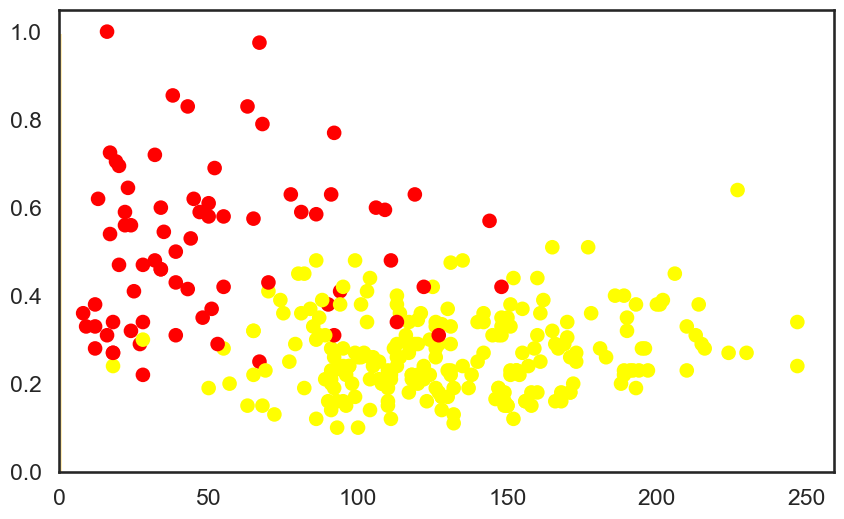

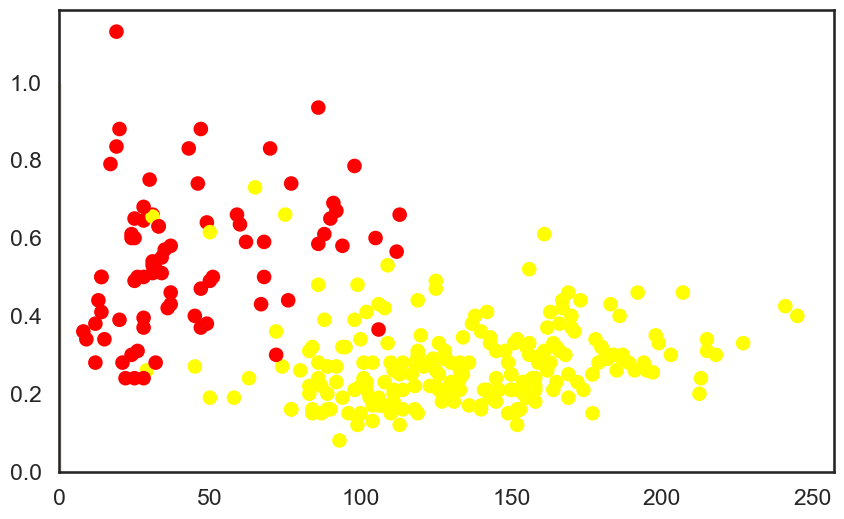

In [49]:
# Try with Polynomial kernel SVC

Cs = [10, 20, 100, 200]

for C in Cs:
    estimator = SVC(kernel='poly', degree=3, C=C)
    print(f"Decision Boundary for Polynomial Kernel SVC with C = {C}")
    plot_decision_boundary(estimator, X, data['y'])



Compare the fitting times between SVC vs Nystroem with rbf kernel.  


Nystroem+SGD will take much shorter to fit. This difference will be more pronounced if the dataset was bigger.


In [52]:
from sklearn.kernel_approximation import Nystroem
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

y = (data['color'] == 'red').astype(int)
X = data.drop(['color'], axis=1)



In [53]:
%%timeit
clf_svc = SVC(kernel='rbf')
clf_svc.fit(X, y)

147 ms ± 638 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [54]:
%%timeit
transformer = Nystroem(kernel='rbf')
X_transformed = transformer.fit_transform(X)
clf_sgd = SGDClassifier()
clf_sgd.fit(X_transformed, y)

39.5 ms ± 2.47 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [55]:
X_large = pd.concat([X]*5, axis=0)
y_large = pd.concat([y]*5, axis=0)


In [57]:
%%timeit
clf_svc = SVC(kernel='rbf')
clf_svc.fit(X_large, y_large)


3.41 s ± 16.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [58]:
%%timeit
transformer = Nystroem(kernel='rbf')
X_transformed = transformer.fit_transform(X_large)
clf_sgd = SGDClassifier()
clf_sgd.fit(X_transformed, y_large)


160 ms ± 9.37 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Tune hyper-parameters for the svm kernal using GridSearchCV


In [59]:
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV



In [60]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

# 1. Define the target variable y and features X
y = (data['color'] == 'red').astype(int)
X = data.drop(['color'], axis=1)

# 2. Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Set up a parameter grid for C and gamma
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001]
}

# 4. Use GridSearchCV
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5, verbose=1, n_jobs=-1)

# 5. Fit the grid search
grid_search.fit(X_train, y_train)

# 6. Print the best parameters
print("Best Parameters from GridSearchCV:", grid_search.best_params_)

# If you also want to see the mean and standard deviation for each combination:
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']

for mean, std, param in zip(means, stds, params):
    print(f"Mean: {mean:.4f}, Stddev: {std:.4f} with: {param}")


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters from GridSearchCV: {'C': 100, 'gamma': 0.001}
Mean: 0.7587, Stddev: 0.0004 with: {'C': 0.1, 'gamma': 1}
Mean: 0.8579, Stddev: 0.0090 with: {'C': 0.1, 'gamma': 0.1}
Mean: 0.9380, Stddev: 0.0088 with: {'C': 0.1, 'gamma': 0.01}
Mean: 0.9349, Stddev: 0.0069 with: {'C': 0.1, 'gamma': 0.001}
Mean: 0.8084, Stddev: 0.0046 with: {'C': 1, 'gamma': 1}
Mean: 0.9543, Stddev: 0.0089 with: {'C': 1, 'gamma': 0.1}
Mean: 0.9538, Stddev: 0.0080 with: {'C': 1, 'gamma': 0.01}
Mean: 0.9463, Stddev: 0.0069 with: {'C': 1, 'gamma': 0.001}
Mean: 0.8190, Stddev: 0.0059 with: {'C': 10, 'gamma': 1}
Mean: 0.9683, Stddev: 0.0081 with: {'C': 10, 'gamma': 0.1}
Mean: 0.9936, Stddev: 0.0025 with: {'C': 10, 'gamma': 0.01}
Mean: 0.9916, Stddev: 0.0032 with: {'C': 10, 'gamma': 0.001}
Mean: 0.8190, Stddev: 0.0059 with: {'C': 100, 'gamma': 1}
Mean: 0.9683, Stddev: 0.0081 with: {'C': 100, 'gamma': 0.1}
Mean: 0.9952, Stddev: 0.0033 with: {'C': 100, 'g

   Use the model from previous instance to predict 
 

In [61]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# 1. Predict using the best model
y_pred = grid_search.best_estimator_.predict(X_test)

# 2. Compute and print the metrics
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Accuracy
print("\nAccuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[1448    0]
 [   2  500]]

Accuracy: 0.9989743589743589

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1448
           1       1.00      1.00      1.00       502

    accuracy                           1.00      1950
   macro avg       1.00      1.00      1.00      1950
weighted avg       1.00      1.00      1.00      1950

